In [16]:
import sys
import numpy as np
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from mlxtend.data import loadlocal_mnist
import matplotlib.pyplot as plt
import itertools

In [17]:
print('Loading MNIST')
X_train, Y_train = loadlocal_mnist(
        images_path='mnist/train-images.idx3-ubyte',
        labels_path='mnist/train-labels.idx1-ubyte')
X_test, Y_test = loadlocal_mnist(
        images_path='mnist/t10k-images.idx3-ubyte',
        labels_path='mnist/t10k-labels.idx1-ubyte')

Loading MNIST


In [18]:
print("Instantiating KNN")
knn = KNeighborsClassifier(n_neighbors=1,metric ='minkowski', p = 2, n_jobs=-1)

Instantiating KNN


In [19]:
print("knn fit")
knn.fit(X_train[:10000],Y_train[:10000])

knn fit


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
                     weights='uniform')

In [24]:
Y_pred = knn.predict(X_test)

In [21]:
print(f'Error rate is {1-knn.score(X_test, Y_test)}')

Test data accuracy is 0.9463


Plotting confusion matrix for test set


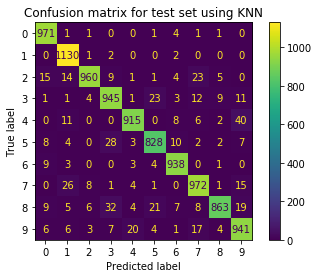

In [22]:
print("Plotting confusion matrix for test set")

disp = plot_confusion_matrix(knn,X_test,Y_test,values_format='g')
disp.ax_.set_title("Confusion matrix for test set using KNN")
plt.savefig('mnist_task1_confusion_matrix_testset.png')
plt.show()

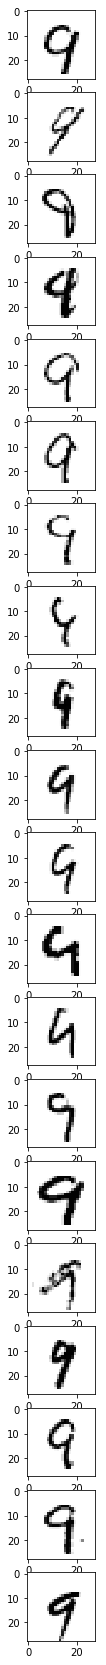

In [28]:
idx = np.where((Y_pred == 4) & (Y_test == 9))[0]
fig = plt.figure(figsize=(5, 30))
for i in range(minlen(idx)):
    ax = fig.add_subplot(len(idx), 1, i+1)
    imgplot = ax.imshow(np.reshape(X_test[idx[i], :], (28,28)),
    cmap = plt.cm.get_cmap('Greys'))
    imgplot.set_interpolation("nearest")

plt.show()

0.9463 0.05369999999999997


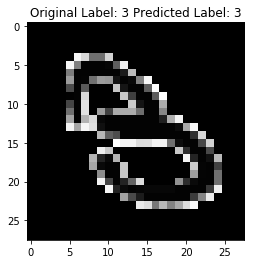

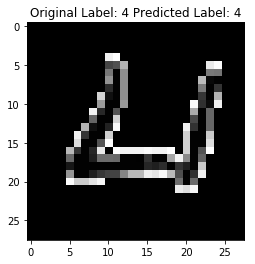

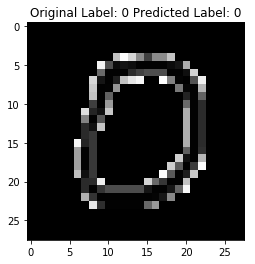

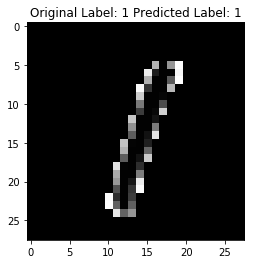

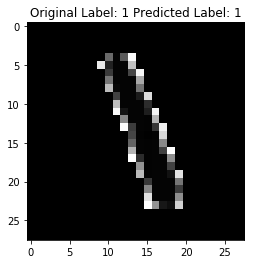

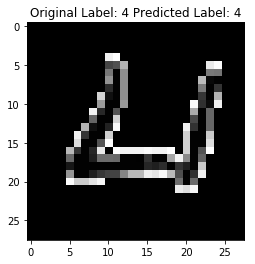

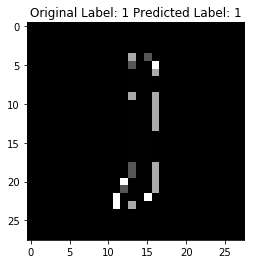

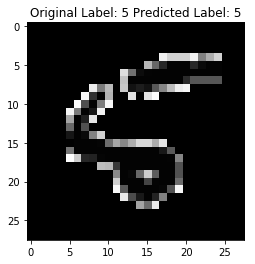

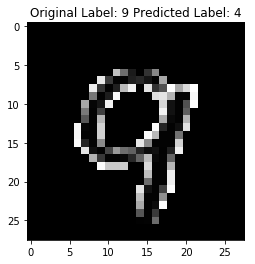

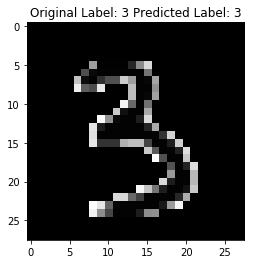

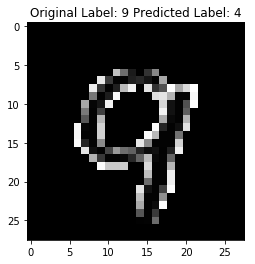

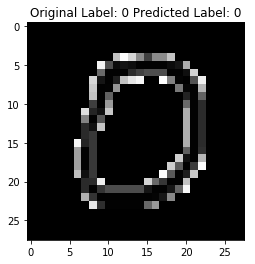

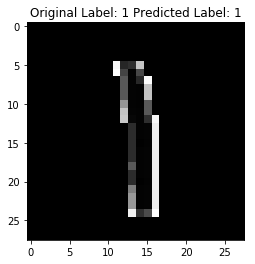

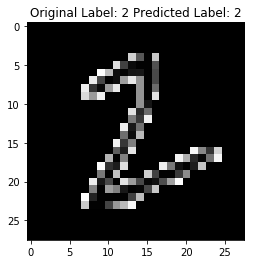

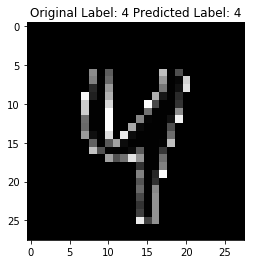

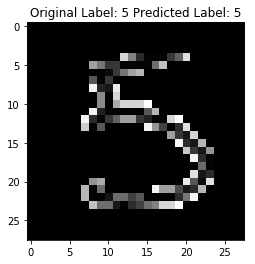

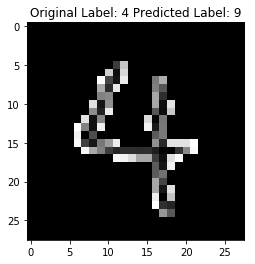

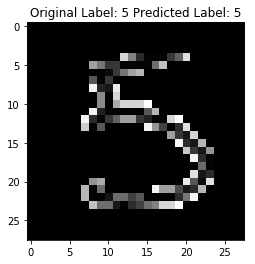

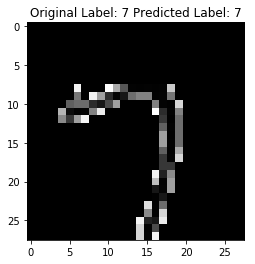

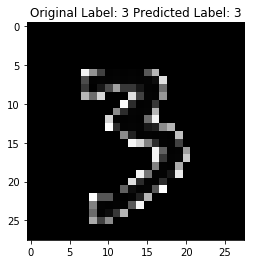

In [27]:
accuracy = accuracy_score(Y_test, Y_pred)
error_rate = 1 - accuracy
print(accuracy, error_rate)

# Show the Test Images with Original and Predicted Labels
a = np.random.randint(1,50,20)
for i in a:
    two_d = (np.reshape(X_test[i], (28, 28)) * 255).astype(np.uint8)
    plt.title(f'Original Label: {Y_test[i]} Predicted Label: {Y_pred[i]}')
    plt.imshow(two_d, interpolation='nearest',cmap='gray')
    plt.savefig(f"mnist_1_")
    plt.show()



